In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df1.shape

(10000, 11)

There are 10000 rows in our dataset

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [21]:
df1['HasCrCard']=df1['HasCrCard'].astype('object')
df1['IsActiveMember']=df1['IsActiveMember'].astype('object')
df1['Exited']=df1['Exited'].astype('object')

In [22]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [23]:
num_col=df1.select_dtypes(exclude='object')
cat_col=df1.select_dtypes(include='object')

In [24]:
cat_col.columns

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'], dtype='object')

In [25]:
num_col.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [26]:
for i in cat_col.columns:
    print(df1[i].value_counts(normalize=True)*100)

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64
Male      54.57
Female    45.43
Name: Gender, dtype: float64
1    70.55
0    29.45
Name: HasCrCard, dtype: float64
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64
0    79.63
1    20.37
Name: Exited, dtype: float64


In [19]:
df1.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values in our dataset.

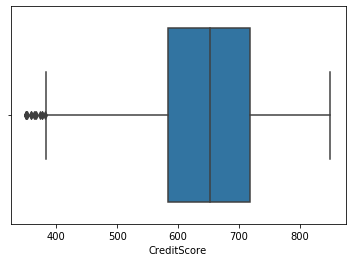

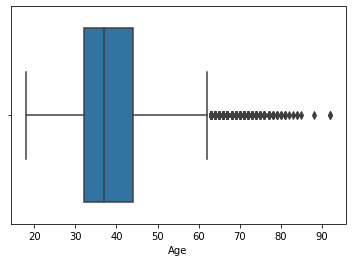

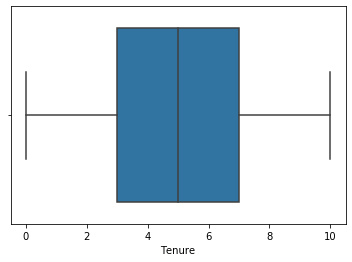

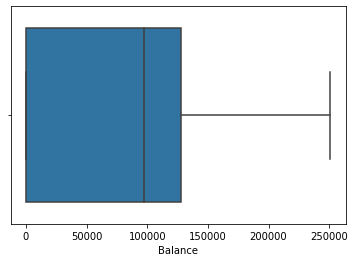

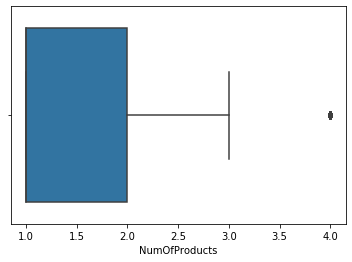

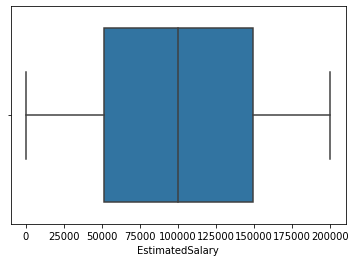

In [27]:
for i in num_col.columns:
    sns.boxplot(df1[i])
    plt.show()

There are no outliers in the dataset.We can't consider Age and Credit Score as features with outliers since they are static values. 

In [20]:
df1['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

The target variable is not imbalanced also.

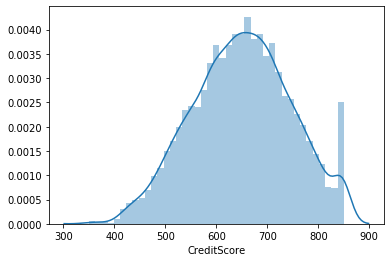

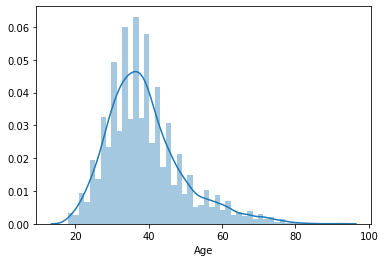

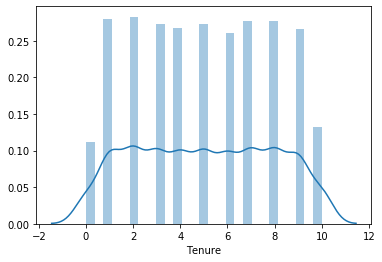

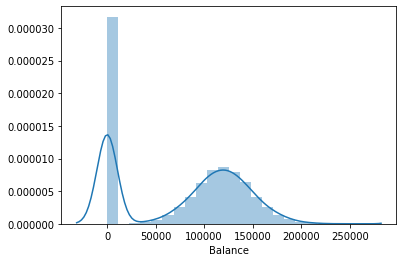

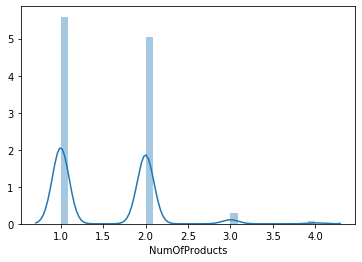

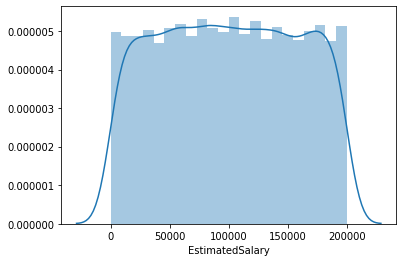

In [122]:
for i in num_col:
    sns.distplot(df1[i])
    plt.show()

In [121]:
df1.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

From the skewness values we can see that the dataset is normally distributed.

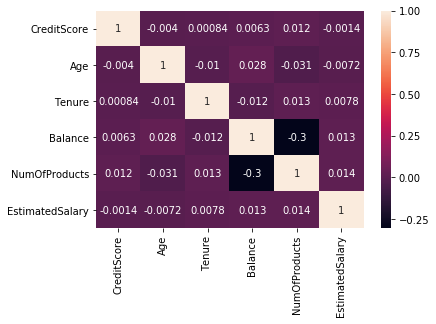

In [29]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

There is no stron correlation among the variables so we can say that there is no multicollinearity.
I have already dropped RowNumber,Surname,CustomerId since they are not necessary for model building.

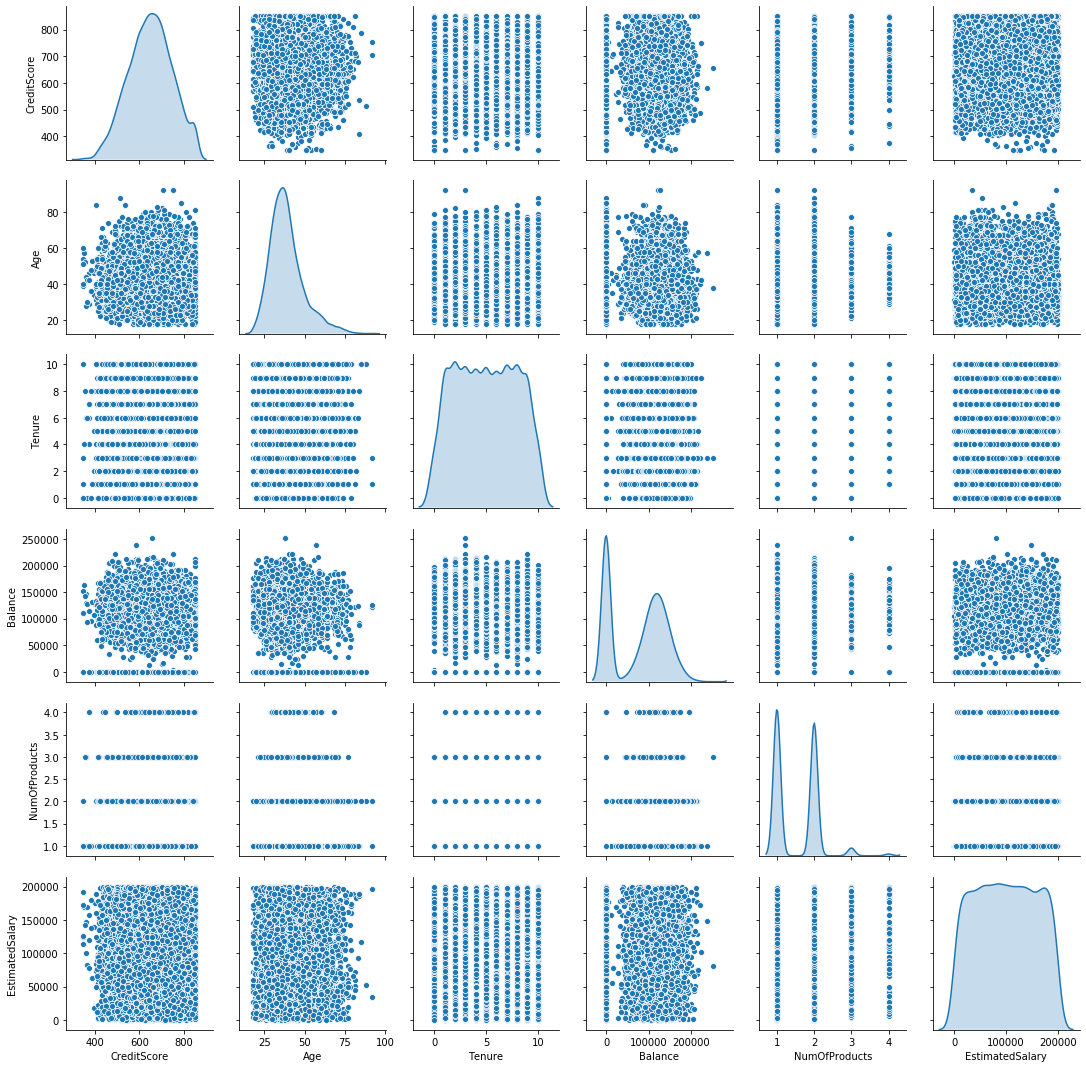

In [31]:
sns.pairplot(num_col,diag_kind='kde')
plt.show()

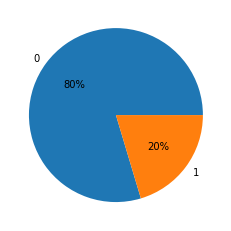

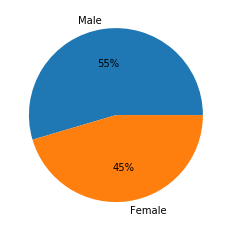

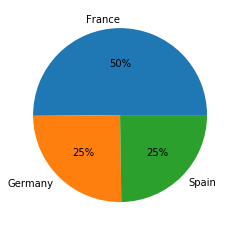

In [44]:
for i in ['Exited','Gender','Geography']:
    plt.pie(df1[i].value_counts(),labels=df1[i].value_counts().index,autopct='%1.f%%')
    plt.show()

20% customers have exited the bank the remaining 80% are retained customers.
Bank has 55% male and 45% female customers.
half of the customers are from France and the remaining half are from Spain and Germant

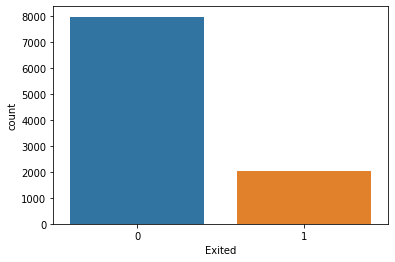

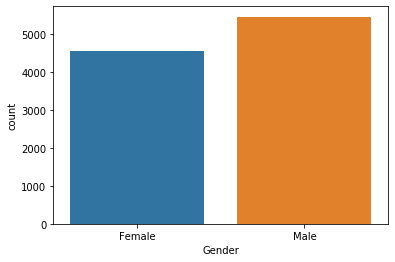

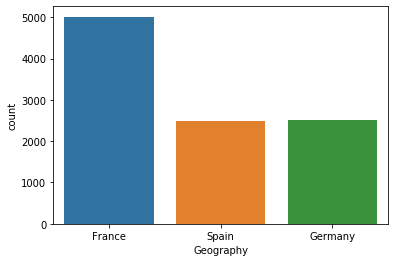

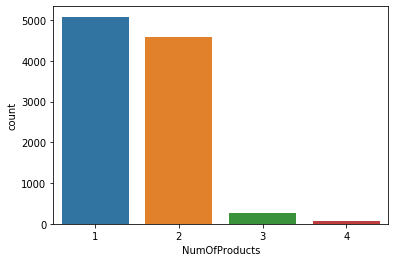

In [48]:
for i in ['Exited','Gender','Geography','NumOfProducts']:
    sns.countplot(df1[i])
    plt.show()

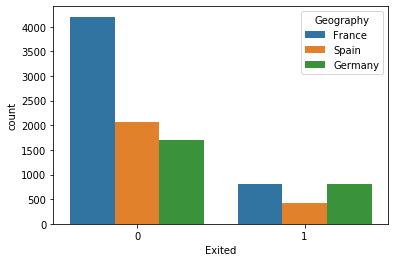

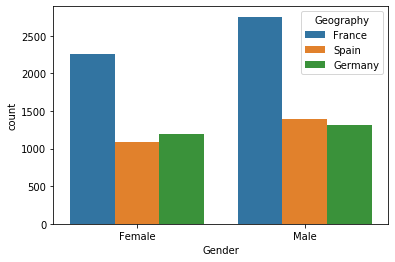

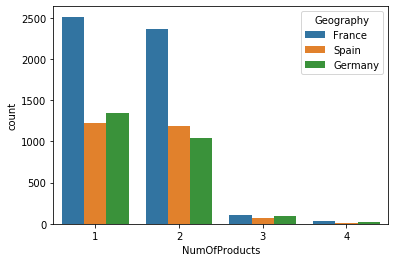

In [58]:
for i in ['Exited','Gender','NumOfProducts']:
    sns.countplot(df1[i],hue=df1['Geography'])
    plt.show()

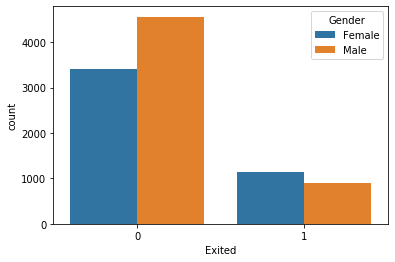

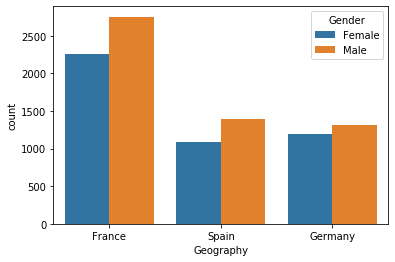

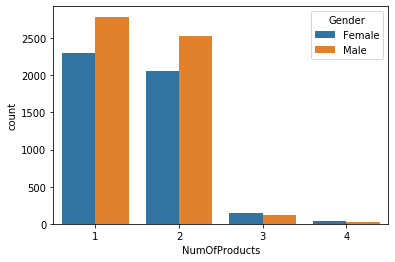

In [59]:
for i in ['Exited','Geography','NumOfProducts']:
    sns.countplot(df1[i],hue=df1['Gender'])
    plt.show()

In [60]:
from scipy.stats import ttest_ind
df_churn=df1[df1['Exited']==1]
df_not_churn=df1[df1['Exited']==0]

In [62]:
for i in num_col:
    _,pval=ttest_ind(df_churn[i],df_not_churn[i])
    print(i,pval)

CreditScore 0.006738213892192373
Age 1.2399313093427738e-186
Tenure 0.16152684949473256
Balance 1.2755633191525477e-32
NumOfProducts 1.717333004804293e-06
EstimatedSalary 0.22644042802223346


In [63]:
num_col.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10


In [64]:
cat_col.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [70]:
cat_col=cat_col.drop('Exited',axis=1)

In [71]:
cat_col1=pd.get_dummies(cat_col,columns=cat_col.columns,drop_first=True)

In [72]:
cat_col1.head()

,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,0,0,0,1,1
1,0,1,0,0,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,1,0,1,1


In [75]:
df2=pd.concat([num_col,cat_col1],axis=1)
df2=pd.concat([df2,df1['Exited']],axis=1)
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,Exited
0,619,42,2,0.00,1,101348.88,0,0,0,1,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0,1
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1,0


In [99]:
y.dtype

dtype('O')

In [100]:
X=df2.drop('Exited',axis=1)
y=df2['Exited']
y=y.astype('int')

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [93]:
X_train.shape

(7000, 11)

In [95]:
y_train.shape

(7000,)

In [96]:
X_test.shape

(3000, 11)

In [97]:
y_test.shape

(3000,)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score

In [103]:
lor=LogisticRegression(solver='liblinear')
lor.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [114]:
y_train_pred=lor.predict(X_train)
y_train_prob=lor.predict_proba(X_train)[:,1]
y_test_pred=lor.predict(X_test)
y_test_prob=lor.predict_proba(X_test)[:,1]

In [124]:
print('Train_Results\n')
print(confusion_matrix(y_train,y_train_pred))
print('Accuracy_score:',accuracy_score(y_train,y_train_pred),'\n')
print(classification_report(y_train,y_train_pred),'\n')
print('Test_Results\n')
print(confusion_matrix(y_test,y_test_pred),'\n')
print('Accuracy_score:',accuracy_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')
print('Auc_train:',roc_auc_score(y_train,y_train_prob))
print('Auc_test:',roc_auc_score(y_test,y_test_prob),'\n')
print('Cohen-Kappa score:',cohen_kappa_score(y_test,y_test_pred))


Train_Results

[[5391  156]
 [1356   97]]
Accuracy_score: 0.784 

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5547
           1       0.38      0.07      0.11      1453

    accuracy                           0.78      7000
   macro avg       0.59      0.52      0.50      7000
weighted avg       0.71      0.78      0.72      7000
 

Test_Results

[[2347   69]
 [ 531   53]] 

Accuracy_score: 0.8 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.43      0.09      0.15       584

    accuracy                           0.80      3000
   macro avg       0.62      0.53      0.52      3000
weighted avg       0.74      0.80      0.74      3000
 

Auc_train: 0.6817297123461391
Auc_test: 0.6715893756236959 

Cohen-Kappa score: 0.08884011371275391


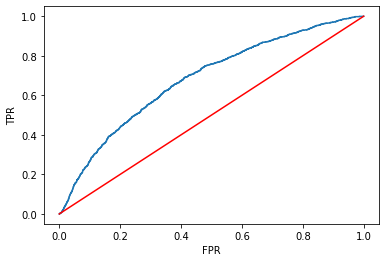

In [119]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [128]:
import statsmodels.api as sm
lg=sm.Logit(y_train,X_train).fit()
lg.summary()

Optimization terminated successfully.
         Current function value: 0.442729
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                  0.1331
Time:                        06:14:09   Log-Likelihood:                -3099.1
converged:                       True   LL-Null:                       -3575.0
Covariance Type:            nonrobust   LLR p-value:                4.308e-198
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0035      0.000    -15.691      0.000      -0.004      -0.003
Age                   0.0577      0.003     20.923      0.000       0.052       0.063
Tenure               -0.0441      0.011     -4.072      0.000      -0.065      -0.023
Balance            1.218e-06   5.84e-07      2.085      0.037    7.29e-08    2.36e-06
NumOfProducts        -0.2880      0.054     -5.360      0.000      -0.393      -0.183
EstimatedSalary   -1.145e-06   5.43e-07     -2.108      0.035   -2.21e-06   -8.03e-08
Geography_Germany     0.7895      0.080      9.898      0.000       0.633       0.946
Geography_Spain       0.0137      0.082      0.167      0.867      -0.147       0.174
Gender_Male          -0.6241      0.063     -9.867      0.000      -0.748      -0.500
HasCrCard_1          -0.2082      0.067     -3.093      0.002      -0.340      -0.076
IsActiveMember_1     -1.0474      0.067    -15.669      0.000      -1.178      -0.916
=====================================================================================
"""

In [130]:
pd.DataFrame(lg.pvalues,index=df1.columns)

,0
CreditScore,1.746090e-55
Geography,NaN
Gender,NaN
Age,3.272118e-97
Tenure,4.658212e-05
Balance,3.709780e-02
NumOfProducts,8.330257e-08
HasCrCard,NaN
IsActiveMember,NaN
EstimatedSalary,3.505504e-02


In [164]:
for i in num_col:
    _,pval=ttest_ind(df_churn[i],df_not_churn[i])
    print(i,pval)

CreditScore 0.006738213892192373
Age 1.2399313093427738e-186
Tenure 0.16152684949473256
Balance 1.2755633191525477e-32
NumOfProducts 1.717333004804293e-06
EstimatedSalary 0.22644042802223346


Overall accuracy that the model will correctly classify whether the customer will exit in this dataset,
i.e The sum of True Positive and True Negaticves divided by the Total number of customers.

In this base model we are getting accuracy of 0.8,we can try by using bagging and boosting method and see whether the 
accuracy increases are not.

Precission is the accuracy of Positive Predictions.It is the ratio oftrue positives to the sum of true positive and false positive.

Recall is the ability to  correctly find all the positive instances.It is the ratio oftrue positives to the sum of true positive and false negative.

F1-score is the weighted average of precission and recall.

From the p-values(ttest) we can see that Credit Score,Age,No.of.Product,Balance are the important features influencing the customers to Churn.

To increase the Accuracy score we can try bagging Method and check whether it is increasing or not.

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [140]:
rfc=RandomForestClassifier(random_state=4)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=4)

In [141]:
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]

In [142]:
print('Train_Results\n')
print(confusion_matrix(y_train,y_train_pred))
print('Accuracy_score:',accuracy_score(y_train,y_train_pred),'\n')
print(classification_report(y_train,y_train_pred),'\n')
print('Test_Results\n')
print(confusion_matrix(y_test,y_test_pred),'\n')
print('Accuracy_score:',accuracy_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')
print('Auc_train:',roc_auc_score(y_train,y_train_prob))
print('Auc_test:',roc_auc_score(y_test,y_test_prob),'\n')


Train_Results

[[5547    0]
 [   0 1453]]
Accuracy_score: 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000
 

Test_Results

[[2336   80]
 [ 310  274]] 

Accuracy_score: 0.87 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000
 

Auc_train: 1.0
Auc_test: 0.8591432402703438 



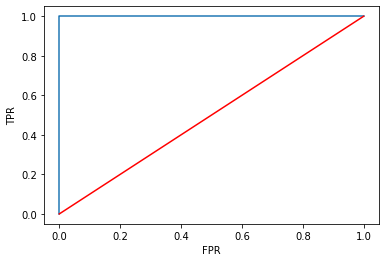

In [143]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

The accuracy score which we got looks like the model is overfitting, so lets correct it with hyper paramete tunning.

In [139]:
rfc=RandomForestClassifier(random_state=4)
params={
    'n_estimators':sp_randint(50,400),
    'criterion':['gini','entropy'],
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,25),
    'min_samples_leaf':sp_randint(1,25),
    'max_features':sp_randint(2,26)
}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,cv=3,scoring='roc_auc',return_train_score=True,n_iter=50,n_jobs=1
                           ,random_state=5)
rsearch.fit(X_train,y_train)

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/deploy/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(b

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=50, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f213ec9ba58>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f213e37e8d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f213e37e7f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f213e37ee48>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f213e6439e8>},
                   random_state=5, return_train_score=True, scoring='roc_auc')

In [144]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 384}

In [145]:
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=4)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=8,
                       min_samples_leaf=8, min_samples_split=5,
                       n_estimators=384, random_state=4)

In [146]:
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]

In [147]:
print('Train_Results\n')
print(confusion_matrix(y_train,y_train_pred))
print('Accuracy_score:',accuracy_score(y_train,y_train_pred),'\n')
print(classification_report(y_train,y_train_pred),'\n')
print('Test_Results\n')
print(confusion_matrix(y_test,y_test_pred),'\n')
print('Accuracy_score:',accuracy_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')
print('Auc_train:',roc_auc_score(y_train,y_train_prob))
print('Auc_test:',roc_auc_score(y_test,y_test_prob),'\n')

Train_Results

[[5383  164]
 [ 745  708]]
Accuracy_score: 0.8701428571428571 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5547
           1       0.81      0.49      0.61      1453

    accuracy                           0.87      7000
   macro avg       0.85      0.73      0.77      7000
weighted avg       0.86      0.87      0.86      7000
 

Test_Results

[[2343   73]
 [ 316  268]] 

Accuracy_score: 0.8703333333333333 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000
 

Auc_train: 0.8988328605543245
Auc_test: 0.8657827667150504 



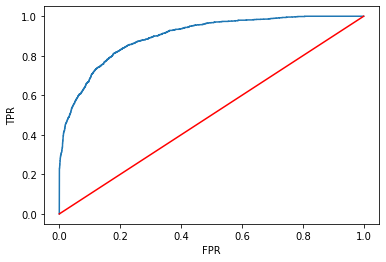

In [148]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In Random Forest Method after tunning we are getting accuracy of 0.87 which is increased when compared to Base model.

Now lets try LightGB Boodting Method to see whether we can increase our accuracy score still.

In [149]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

In [150]:
ss=StandardScaler()
X_train1=ss.fit_transform(X_train)
X_test1=ss.fit_transform(X_test)

In [151]:
lgbm=lgb.LGBMClassifier(random_state=4)
lgbm.fit(X_train1,y_train)

LGBMClassifier(random_state=4)

In [152]:
y_train_pred=lgbm.predict(X_train1)
y_train_prob=lgbm.predict_proba(X_train1)[:,1]
y_test_pred=lgbm.predict(X_test1)
y_test_prob=lgbm.predict_proba(X_test1)[:,1]

In [153]:
print('Train_Results\n')
print(confusion_matrix(y_train,y_train_pred))
print('Accuracy_score:',accuracy_score(y_train,y_train_pred),'\n')
print(classification_report(y_train,y_train_pred),'\n')
print('Test_Results\n')
print(confusion_matrix(y_test,y_test_pred),'\n')
print('Accuracy_score:',accuracy_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')
print('Auc_train:',roc_auc_score(y_train,y_train_prob))
print('Auc_test:',roc_auc_score(y_test,y_test_prob),'\n')

Train_Results

[[5456   91]
 [ 474  979]]
Accuracy_score: 0.9192857142857143 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5547
           1       0.91      0.67      0.78      1453

    accuracy                           0.92      7000
   macro avg       0.92      0.83      0.86      7000
weighted avg       0.92      0.92      0.91      7000
 

Test_Results

[[2329   87]
 [ 291  293]] 

Accuracy_score: 0.874 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.77      0.50      0.61       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.77      3000
weighted avg       0.87      0.87      0.86      3000
 

Auc_train: 0.9676696331207596
Auc_test: 0.8626139662523814 



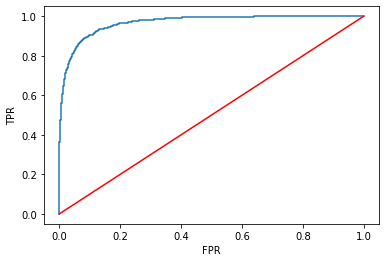

In [154]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [157]:
Xs=ss.fit_transform(X)
lgbc=lgb.LGBMClassifier(random_state=4)
params={
    'n_estimators':sp_randint(50,300),
    'max_depth':sp_randint(2,10),
    'num_leaf':sp_randint(10,100),
    'learning_rate':sp_uniform(0,0.5)
}
rsearch=RandomizedSearchCV(lgbc,param_distributions=params,cv=3,scoring='roc_auc',return_train_score=True,n_iter=50,n_jobs=1
                           ,random_state=5)
rsearch.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=4), n_iter=50,
                   n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f213e5bc0b8>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f218637f780>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f218627d278>,
                                        'num_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f213e5bc588>},
                   random_state=5, return_train_score=True, scoring='roc_auc')

In [158]:
rsearch.best_params_

{'learning_rate': 0.11074138002149758,
 'max_depth': 4,
 'n_estimators': 70,
 'num_leaf': 10}

In [159]:
lgbm=lgb.LGBMClassifier(**rsearch.best_params_,random_state=4)
lgbm.fit(X_train1,y_train)

LGBMClassifier(learning_rate=0.11074138002149758, max_depth=4, n_estimators=70,
               num_leaf=10, random_state=4)

In [160]:
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]

In [161]:
print('Train_Results\n')
print(confusion_matrix(y_train,y_train_pred))
print('Accuracy_score:',accuracy_score(y_train,y_train_pred),'\n')
print(classification_report(y_train,y_train_pred),'\n')
print('Test_Results\n')
print(confusion_matrix(y_test,y_test_pred),'\n')
print('Accuracy_score:',accuracy_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')
print('Auc_train:',roc_auc_score(y_train,y_train_prob))
print('Auc_test:',roc_auc_score(y_test,y_test_prob),'\n')

Train_Results

[[5383  164]
 [ 745  708]]
Accuracy_score: 0.8701428571428571 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5547
           1       0.81      0.49      0.61      1453

    accuracy                           0.87      7000
   macro avg       0.85      0.73      0.77      7000
weighted avg       0.86      0.87      0.86      7000
 

Test_Results

[[2343   73]
 [ 316  268]] 

Accuracy_score: 0.8703333333333333 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000
 

Auc_train: 0.8988328605543245
Auc_test: 0.8657827667150504 



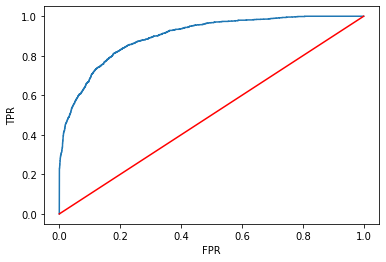

In [162]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt
plt.show()

Therefore the maximum accuracy score that we got  is 0.87 which is nearer to 1 ,i.e our model is good and better than the base model.Both the accuracy of models(RandomForrest after hyper parameter tunning and LGB after tunning) are same.

 The base model that we built is based on LogisticRegression. From that model we got accuracy score of 0.8for test data    and
 0.7 for train data.And when we visualize in the roc curve we can see that the model needs lots of improvement,so next model is built
 on Bagging Method.

 The Bagging Method that we choose for model building is Random Forrest.When we build the Random Forrest model we can see  that 
 the model is overlapped.To correct our model then we use Hyper parameter tunning (RandomizedCV method).In this tunning  method we got
 the best parameters and we then passed those best parameters to the RandomForest Classifier and built the model with test  accuracy 0.8701
 and train accuracy 0.8703.

 To check whether we can improve our model or not ,we built a model using LightGB Method.In this we found the best  parameters for
 the model using Hyper parameter tunning(RandomizedCV Method).After tuning we got train accuracy as 0.8701 and test 0.8703.

 Therfore LGB abd RandomForest model says that they can predict whether the customer will churn or not with a accuracy of 87%.

The most important features in the model are Credict Score ,Balance,No.of.Product and Age.i.e
If we concentrate on those customers whose are on the border of liability to churn we can get lots of profit with less investment.

 The Key risk to the model is that sometimes the model may not predict the churn properly ,if some of the relevent features are missing while giving the input data to the model.